In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, Normalizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets

In [ ]:
df=pd.read_csv("BeijingPM20100101_20151231.csv")
df.head()

No  year  month  day  hour  ...  TEMP  cbwd    Iws  precipitation  Iprec
0   1  2010      1    1     0  ... -11.0    NW   1.79            0.0    0.0
1   2  2010      1    1     1  ... -12.0    NW   4.92            0.0    0.0
2   3  2010      1    1     2  ... -11.0    NW   6.71            0.0    0.0
3   4  2010      1    1     3  ... -14.0    NW   9.84            0.0    0.0
4   5  2010      1    1     4  ... -12.0    NW  12.97            0.0    0.0

[5 rows x 18 columns]

In [ ]:
print(df.shape)
print(df.info())

(52584, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               52584 non-null  int64  
 1   year             52584 non-null  int64  
 2   month            52584 non-null  int64  
 3   day              52584 non-null  int64  
 4   hour             52584 non-null  int64  
 5   season           52584 non-null  int64  
 6   PM_Dongsi        25052 non-null  float64
 7   PM_Dongsihuan    20508 non-null  float64
 8   PM_Nongzhanguan  24931 non-null  float64
 9   PM_US Post       50387 non-null  float64
 10  DEWP             52579 non-null  float64
 11  HUMI             52245 non-null  float64
 12  PRES             52245 non-null  float64
 13  TEMP             52579 non-null  float64
 14  cbwd             52579 non-null  object 
 15  Iws              52579 non-null  float64
 16  precipitation    52100 non-null  float64
 17  

In [ ]:
df.drop(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan'], inplace= True, axis = 1)

In [ ]:
print(df.shape)

(52584, 15)


In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)

Total   Percent
PM_US Post      2197  0.041781
Iprec            484  0.009204
precipitation    484  0.009204
PRES             339  0.006447
HUMI             339  0.006447
Iws                5  0.000095
cbwd               5  0.000095
TEMP               5  0.000095
DEWP               5  0.000095
season             0  0.000000
hour               0  0.000000
day                0  0.000000
month              0  0.000000
year               0  0.000000
No                 0  0.000000

In [ ]:
print(df.loc[df['Iws'].isnull()].index)
print(df.loc[df['cbwd'].isnull()].index)
print(df.loc[df['TEMP'].isnull()].index)
print(df.loc[df['DEWP'].isnull()].index)

Int64Index([45922, 47954, 49271, 51328, 51891], dtype='int64')
Int64Index([45922, 47954, 49271, 51328, 51891], dtype='int64')
Int64Index([45922, 47954, 49271, 51328, 51891], dtype='int64')
Int64Index([45922, 47954, 49271, 51328, 51891], dtype='int64')


In [ ]:
#df.drop([45922, 47954, 49271, 51328, 51891], inplace= True, axis = 0)

In [ ]:
print(df.loc[df['PRES'].isnull()].index)
print(df.loc[df['HUMI'].isnull()].index)
print(df.loc[df['Iprec'].isnull()].index)
print(df.loc[df['precipitation'].isnull()].index)

Int64Index([45922, 47954, 49271, 51257, 51258, 51259, 51260, 51261, 51262,
            51263,
            ...
            51600, 51601, 51602, 51603, 51604, 51605, 51606, 51607, 51608,
            51891],
           dtype='int64', length=339)
Int64Index([45922, 47954, 49271, 51257, 51258, 51259, 51260, 51261, 51262,
            51263,
            ...
            51600, 51601, 51602, 51603, 51604, 51605, 51606, 51607, 51608,
            51891],
           dtype='int64', length=339)
Int64Index([42424, 42437, 42684, 42708, 42756, 42780, 42899, 42900, 42901,
            42902,
            ...
            52335, 52336, 52337, 52338, 52339, 52340, 52341, 52342, 52373,
            52408],
           dtype='int64', length=484)
Int64Index([42424, 42437, 42684, 42708, 42756, 42780, 42899, 42900, 42901,
            42902,
            ...
            52335, 52336, 52337, 52338, 52339, 52340, 52341, 52342, 52373,
            52408],
           dtype='int64', length=484)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


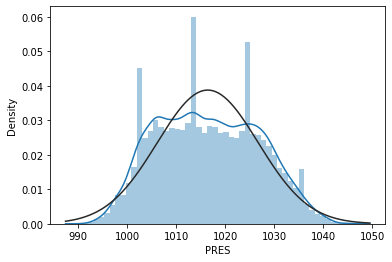

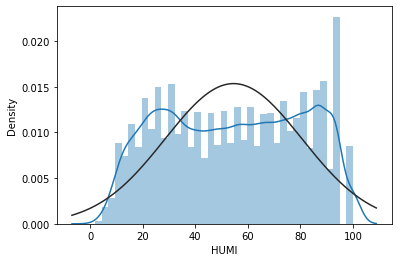

In [ ]:
sb.distplot(df['PRES'], fit=norm)
plt.figure()
sb.distplot(df['HUMI'], fit=norm)


In [ ]:
#df['PRES'].fillna(df['PRES'].mean(), inplace=True)
#df['HUMI'].fillna(df['HUMI'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


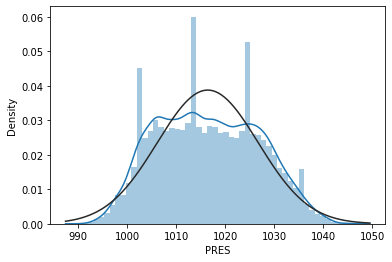

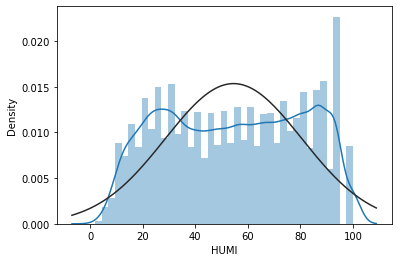

In [ ]:
sb.distplot(df['PRES'], fit=norm)
plt.figure()
sb.distplot(df['HUMI'], fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


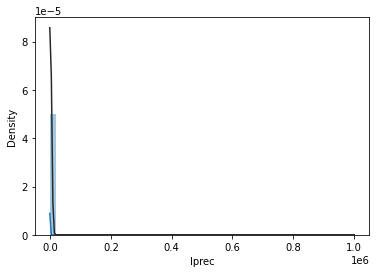

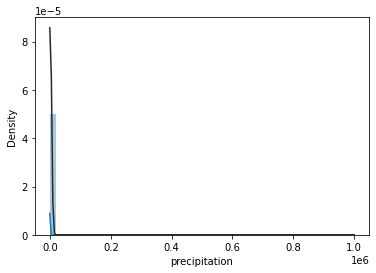

In [ ]:
sb.distplot(df['Iprec'], fit=norm)
plt.figure()
sb.distplot(df['precipitation'], fit=norm)

In [ ]:
#df['Iprec'].fillna(df['Iprec'].mean(), inplace=True)
#df['precipitation'].fillna(df['precipitation'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


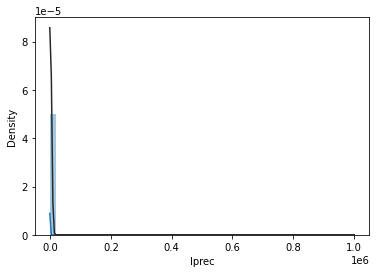

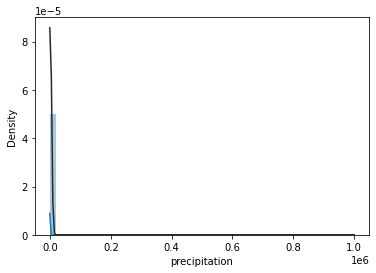

In [ ]:
sb.distplot(df['Iprec'], fit=norm)
plt.figure()
sb.distplot(df['precipitation'], fit=norm)

In [ ]:
df1=df.groupby(by='year').count()
df1

No  month   day  hour  season  ...  TEMP  cbwd   Iws  precipitation  Iprec
year                                   ...                                        
2010  8760   8760  8760  8760    8760  ...  8760  8760  8760           8760   8760
2011  8760   8760  8760  8760    8760  ...  8760  8760  8760           8760   8760
2012  8784   8784  8784  8784    8784  ...  8784  8784  8784           8784   8784
2013  8760   8760  8760  8760    8760  ...  8760  8760  8760           8760   8760
2014  8760   8760  8760  8760    8760  ...  8760  8760  8760           8735   8735
2015  8760   8760  8760  8760    8760  ...  8755  8755  8755           8301   8301

[6 rows x 14 columns]

In [ ]:
df2=df.groupby(['year','season']).count()
df2['PM_US Post']
df2

No  month   day  hour  ...  cbwd   Iws  precipitation  Iprec
year season                           ...                                  
2010 1       2208   2208  2208  2208  ...  2208  2208           2208   2208
     2       2208   2208  2208  2208  ...  2208  2208           2208   2208
     3       2184   2184  2184  2184  ...  2184  2184           2184   2184
     4       2160   2160  2160  2160  ...  2160  2160           2160   2160
2011 1       2208   2208  2208  2208  ...  2208  2208           2208   2208
     2       2208   2208  2208  2208  ...  2208  2208           2208   2208
     3       2184   2184  2184  2184  ...  2184  2184           2184   2184
     4       2160   2160  2160  2160  ...  2160  2160           2160   2160
2012 1       2208   2208  2208  2208  ...  2208  2208           2208   2208
     2       2208   2208  2208  2208  ...  2208  2208           2208   2208
     3       2184   2184  2184  2184  ...  2184  2184           2184   2184
     4       2184   2184  2184  2184  ...  2184  2184           2184   2184
2013 1       2208   2208  2208  2208  ...  2208  2208           2208   2208
     2       2208   2208  2208  2208  ...  2208  2208           2208   2208
     3       2184   2184  2184  2184  ...  2184  2184           2184   2184
     4       2160   2160  2160  2160  ...  2160  2160           2160   2160
2014 1       2208   2208  2208  2208  ...  2208  2208           2208   2208
     2       2208   2208  2208  2208  ...  2208  2208           2208   2208
     3       2184   2184  2184  2184  ...  2184  2184           2161   2161
     4       2160   2160  2160  2160  ...  2160  2160           2158   2158
2015 1       2208   2208  2208  2208  ...  2207  2207           2066   2066
     2       2208   2208  2208  2208  ...  2206  2206           2080   2080
     3       2184   2184  2184  2184  ...  2183  2183           2097   2097
     4       2160   2160  2160  2160  ...  2159  2159           2058   2058

[24 rows x 13 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


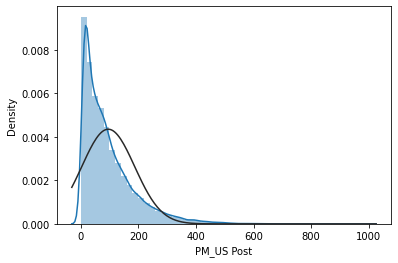

In [ ]:
sb.distplot(df['PM_US Post'], fit=norm)

In [ ]:

#df['PM_US Post'].fillna(method='ffill', inplace=True) #da probam da izbacim sva nan osim pm
#df.dropna(inplace=True, axis=0) #DA PROBAM DA IZBACIM SVE NAN JER IPAK JE TO MALI BROJ UZORAKA
#print(df.shape)

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)

Total   Percent
PM_US Post      2197  0.041781
Iprec            484  0.009204
precipitation    484  0.009204
PRES             339  0.006447
HUMI             339  0.006447
Iws                5  0.000095
cbwd               5  0.000095
TEMP               5  0.000095
DEWP               5  0.000095
season             0  0.000000
hour               0  0.000000
day                0  0.000000
month              0  0.000000
year               0  0.000000
No                 0  0.000000

In [ ]:
df.head()

No  year  month  day  hour  ...  TEMP  cbwd    Iws  precipitation  Iprec
0   1  2010      1    1     0  ... -11.0    NW   1.79            0.0    0.0
1   2  2010      1    1     1  ... -12.0    NW   4.92            0.0    0.0
2   3  2010      1    1     2  ... -11.0    NW   6.71            0.0    0.0
3   4  2010      1    1     3  ... -14.0    NW   9.84            0.0    0.0
4   5  2010      1    1     4  ... -12.0    NW  12.97            0.0    0.0

[5 rows x 15 columns]

In [ ]:
#df.drop(df.iloc[0:23].index, inplace= True,axis=0)

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)

Total   Percent
PM_US Post      2197  0.041781
Iprec            484  0.009204
precipitation    484  0.009204
PRES             339  0.006447
HUMI             339  0.006447
Iws                5  0.000095
cbwd               5  0.000095
TEMP               5  0.000095
DEWP               5  0.000095
season             0  0.000000
hour               0  0.000000
day                0  0.000000
month              0  0.000000
year               0  0.000000
No                 0  0.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


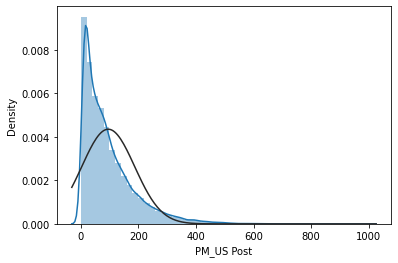

In [ ]:
sb.distplot(df['PM_US Post'], fit=norm)

In [ ]:
df.dropna(inplace=True, axis=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


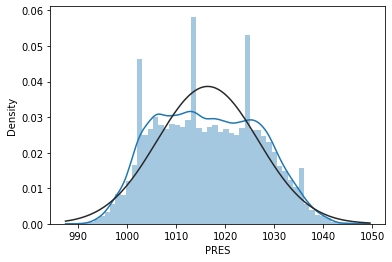

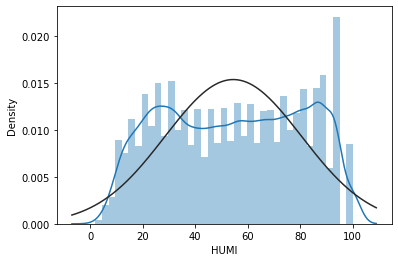

In [ ]:
sb.distplot(df['PRES'], fit=norm)
plt.figure()
sb.distplot(df['HUMI'], fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


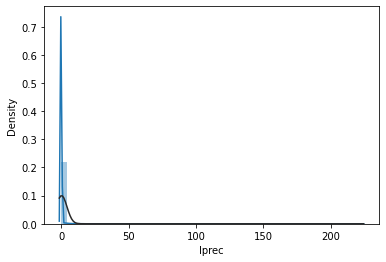

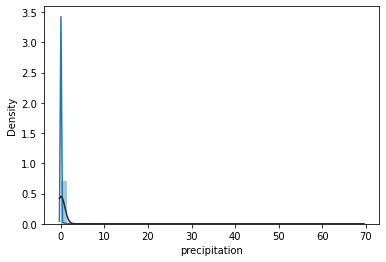

In [ ]:
sb.distplot(df['Iprec'], fit=norm)
plt.figure()
sb.distplot(df['precipitation'], fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


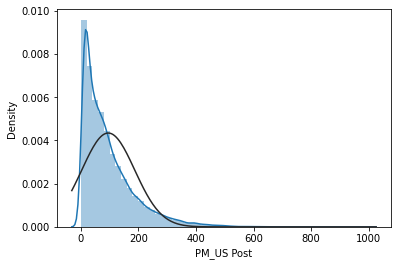

In [ ]:
sb.distplot(df['PM_US Post'], fit=norm)

In [ ]:
print(df.shape)

(49579, 15)


In [ ]:
df.describe()

No          year  ...  precipitation         Iprec
count  49579.000000  49579.000000  ...   49579.000000  49579.000000
mean   26343.611126   2012.509873  ...       0.066544      0.334093
std    14970.831981      1.688580  ...       0.875140      3.980143
min       24.000000   2010.000000  ...       0.000000      0.000000
25%    13479.500000   2011.000000  ...       0.000000      0.000000
50%    26681.000000   2013.000000  ...       0.000000      0.000000
75%    39186.500000   2014.000000  ...       0.000000      0.000000
max    52584.000000   2015.000000  ...      69.200000    223.000000

[8 rows x 14 columns]

In [ ]:
df.loc[df["PM_US Post"]==max(df["PM_US Post"]),:]
print(np.sort(df["PM_US Post"].unique())) #ima dosta velikih vrednosti

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

In [ ]:
df.loc[df["DEWP"]==min(df["DEWP"]),:] #Nije nerealno
print(np.sort(df["DEWP"].unique()))

[-40. -39. -38. -37. -36. -35. -34. -33. -32. -31. -30. -29. -28. -27.
 -26. -25. -24. -23. -22. -21. -20. -19. -18. -17. -16. -15. -14. -13.
 -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.
   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.]


In [ ]:
df.loc[df["HUMI"]==max(df["HUMI"]),:] #Okej

No  year  month  day  hour  ...  TEMP  cbwd    Iws  precipitation  Iprec
1415    1416  2010      2   28    23  ...  -3.0    SE   3.13            0.6    4.7
1420    1421  2010      3    1     4  ...  -5.0    SE  20.12            0.0    0.0
1739    1740  2010      3   14    11  ...  -1.0    NW  16.10            2.2    7.4
1855    1856  2010      3   19     7  ...   2.0    NW   3.57            0.0    0.0
6552    6553  2010     10    1     0  ...  12.0    NE   1.78            0.0    0.0
...      ...   ...    ...  ...   ...  ...   ...   ...    ...            ...    ...
52445  52446  2015     12   26     5  ...  -5.0    cv   0.89            0.0    0.0
52446  52447  2015     12   26     6  ...  -5.0    NW   1.79            0.0    0.0
52447  52448  2015     12   26     7  ...  -5.0    cv   0.89            0.0    0.0
52448  52449  2015     12   26     8  ...  -6.0    NE   1.79            0.0    0.0
52449  52450  2015     12   26     9  ...  -5.0    SE   3.13            0.0    0.0

[1064 rows x 15 columns]

In [ ]:
df.loc[df["TEMP"]==max(df["TEMP"]),:]
print(np.sort(df["TEMP"].unique())) #deluje okej

[-19.         -18.         -17.         -16.         -15.
 -14.         -13.         -12.         -11.         -10.
  -9.          -8.          -7.          -6.          -5.
  -4.          -3.          -2.          -1.           0.
   1.           2.           3.           4.           5.
   6.           7.           8.           9.           9.33333333
  10.          11.          12.          13.          14.
  14.66666667  15.          16.          17.          18.
  19.          20.          21.          22.          23.
  24.          25.          26.          27.          28.
  29.          30.          31.          32.          33.
  34.          35.          36.          37.          38.
  39.          40.          41.          42.        ]


In [ ]:
df.loc[df["PRES"]==max(df["PRES"]),:] #ok valjda
print(np.sort(df["PRES"].unique()))

[ 991.        992.        993.        994.        995.        996.
  997.        998.        999.       1000.       1001.       1002.
 1003.       1004.       1005.       1006.       1007.       1008.
 1009.       1010.       1011.       1012.       1013.       1014.
 1015.       1016.       1017.       1018.       1019.       1019.5
 1020.       1021.       1022.       1023.       1024.       1025.
 1026.       1027.       1027.5      1028.       1029.       1029.666667
 1030.       1031.       1032.       1032.333333 1033.       1034.
 1035.       1036.       1037.       1038.       1039.       1040.
 1041.       1042.       1043.       1044.       1045.       1046.      ]


In [ ]:
#print(df.loc[df["precipitation"]==max(df["precipitation"]),:]) #ok valjda
#print((df.loc[df["precipitation"]==62,:]))
#niz=np.sort(df["precipitation"].unique())
#niz1=df['precipitation']
#niz2=np.zeros(len(niz))
#for i in range(len(niz)):
#  for j in range(len(niz1)):
#    if niz[i]==niz1[j]:
#      niz2[i]=niz2[i]+1
#print(niz2)

In [ ]:
#broj=0
#for k in range(len(niz1)):
#  if niz1[k]==0:
#    broj=broj+1

#print(broj)

[4.5000e-01 8.9000e-01 9.0000e-01 ... 5.4359e+02 5.5253e+02 5.5968e+02]


(array([3.1907e+04, 5.9210e+03, 3.2800e+03, 1.9910e+03, 1.3070e+03,
        9.2500e+02, 6.3500e+02, 4.7900e+02, 3.8500e+02, 3.2500e+02,
        2.6600e+02, 2.5700e+02, 2.0600e+02, 1.9300e+02, 1.6200e+02,
        1.4600e+02, 1.2900e+02, 1.1100e+02, 9.8000e+01, 8.4000e+01,
        8.0000e+01, 6.4000e+01, 6.6000e+01, 6.9000e+01, 6.7000e+01,
        5.9000e+01, 5.3000e+01, 4.9000e+01, 3.5000e+01, 2.6000e+01,
        2.6000e+01, 2.0000e+01, 2.5000e+01, 1.8000e+01, 1.4000e+01,
        1.4000e+01, 1.4000e+01, 1.6000e+01, 1.4000e+01, 1.4000e+01,
        1.0000e+01, 5.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([4.500000e-01, 1.163460e+01, 2.281920e+01, 3.400380e+01,
        4.518840e+01, 5.637300e+01, 6.755760e+01, 7.874220e+01,
        8.992680e+01, 1.011114e+02, 1.122960e+02, 1.234806e+02,
        1.346652e+02, 1.458498e+02, 1.570344e+02, 1.682190e+02,
        1.794036e+02, 1.905882e+02, 2.017728e+02, 2.129574e+02

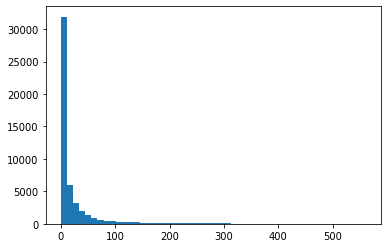

In [ ]:
print(np.sort(df['Iws'].unique()))
plt.hist(df['Iws'],bins=50)

In [ ]:
print(sum(df['PM_US Post']>700))

18


In [ ]:
matrica=df.corr()
print(abs(matrica['PM_US Post']).sort_values())

hour             0.000166
month            0.012855
PRES             0.019871
precipitation    0.027093
Iprec            0.043672
year             0.055131
No               0.055446
day              0.077908
TEMP             0.123285
season           0.124108
DEWP             0.133233
Iws              0.240018
HUMI             0.419491
PM_US Post       1.000000
Name: PM_US Post, dtype: float64


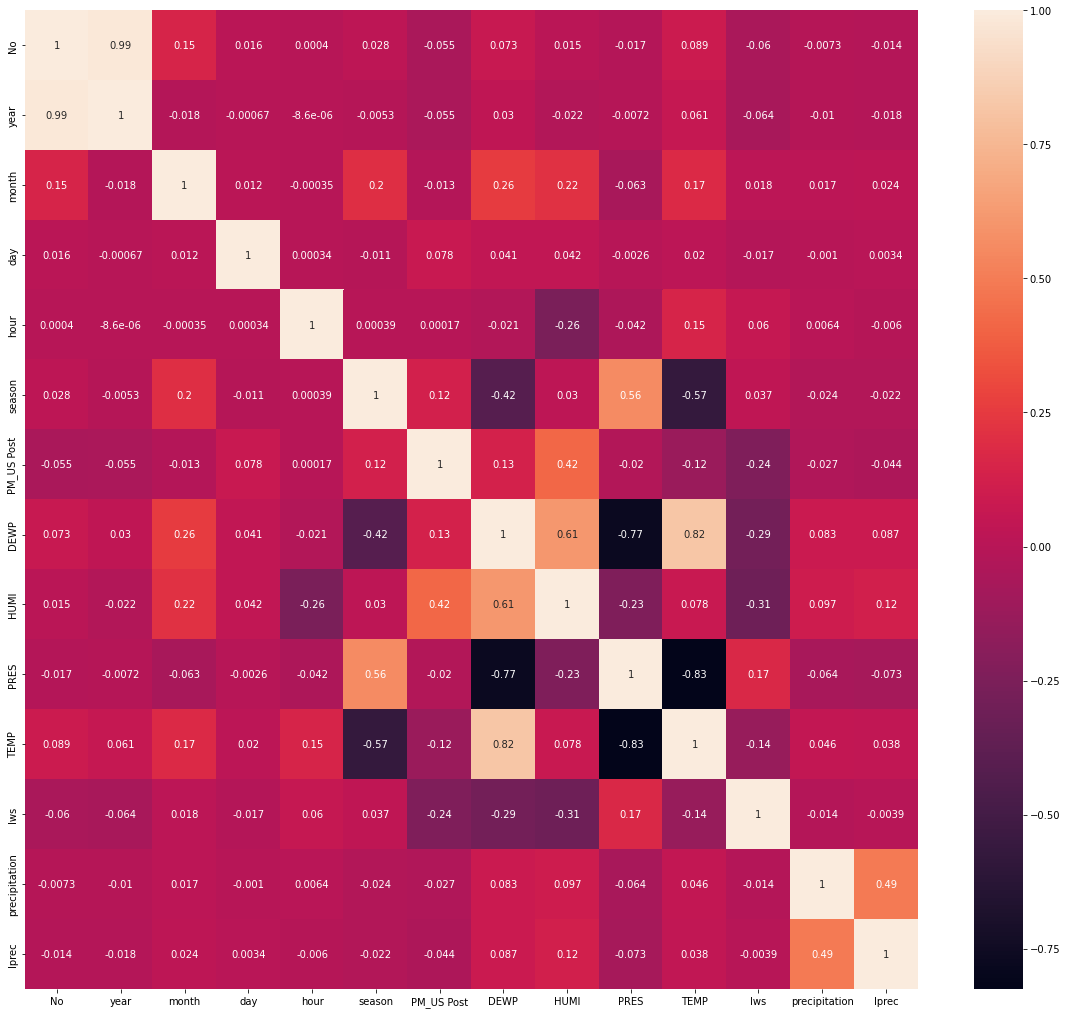

In [ ]:
plt.figure(figsize=(20,18))
sb.heatmap(matrica,annot=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7fb481f39e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb481f37e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb481f51ed0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb481f51990>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb481f37410>,
  <matplotlib.lines.Line2D at 0x7fb481f1ee50>]}

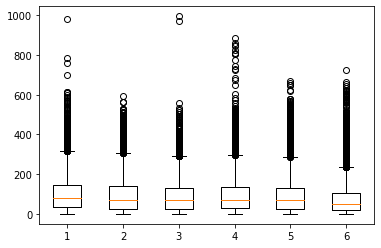

In [ ]:
df_year=df.set_index('year')
plt.boxplot([df_year.loc[2010,'PM_US Post'], df_year.loc[2011,'PM_US Post'],df_year.loc[2012,'PM_US Post'],df_year.loc[2013,'PM_US Post'],df_year.loc[2014,'PM_US Post'],df_year.loc[2015,'PM_US Post']]) 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7fb481ea8f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb481eb5f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb481e39fd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb481e39a90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb481eb5510>,
  <matplotlib.lines.Line2D at 0x7fb481d8d4d0>]}

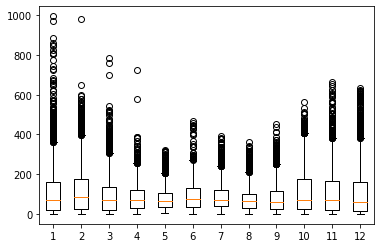

In [ ]:
df_month=df.set_index('month')
plt.boxplot([df_month.loc[1,'PM_US Post'], df_month.loc[2,'PM_US Post'],df_month.loc[3,'PM_US Post'],df_month.loc[4,'PM_US Post'],df_month.loc[5,'PM_US Post'],df_month.loc[6,'PM_US Post'],df_month.loc[7,'PM_US Post'],df_month.loc[8,'PM_US Post'],df_month.loc[9,'PM_US Post'],df_month.loc[10,'PM_US Post'],df_month.loc[11,'PM_US Post'],df_month.loc[12,'PM_US Post']]) 

[4 1 2 3]


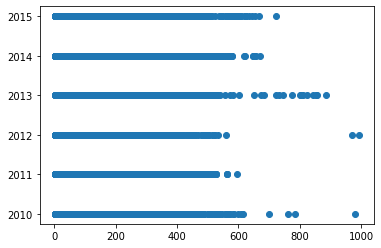

In [ ]:
plt.scatter(df['PM_US Post'],df['year'])
print(df['season'].unique())

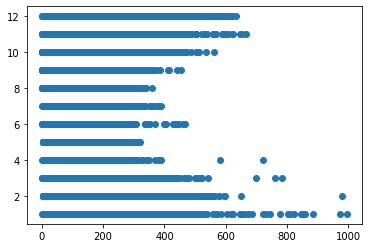

In [ ]:
plt.scatter(df['PM_US Post'],df['month'])

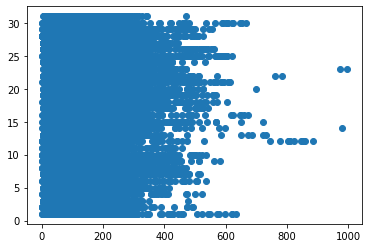

In [ ]:
plt.scatter(df['PM_US Post'],df['day'])

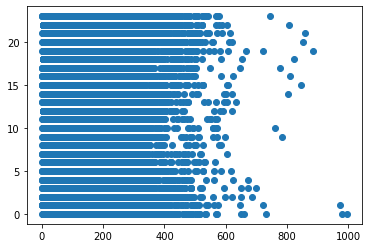

In [ ]:
plt.scatter(df['PM_US Post'],df['hour'])

Text(0, 0.5, 'season')

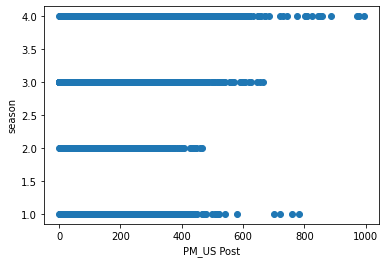

In [ ]:
plt.scatter(df['PM_US Post'],df['season'])
plt.xlabel('PM_US Post')
plt.ylabel('season')

Text(0, 0.5, 'DEWP')

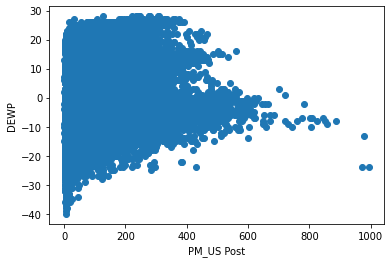

In [ ]:
plt.scatter(df['PM_US Post'],df['DEWP'])
plt.xlabel('PM_US Post')
plt.ylabel('DEWP')

Text(0, 0.5, 'HUMI')

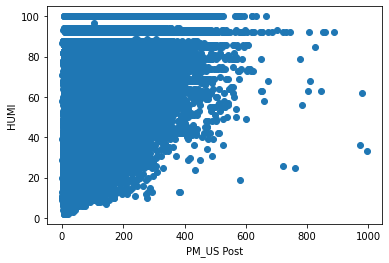

In [ ]:
plt.scatter(df['PM_US Post'],df['HUMI'])
plt.xlabel('PM_US Post')
plt.ylabel('HUMI')

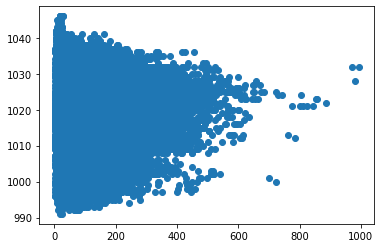

In [ ]:
plt.scatter(df['PM_US Post'],df['PRES'])

Text(0, 0.5, 'TEMP')

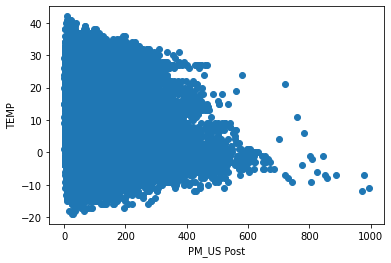

In [ ]:
plt.scatter(df['PM_US Post'],df['TEMP'])
plt.xlabel('PM_US Post')
plt.ylabel('TEMP')

Text(0, 0.5, 'Iws')

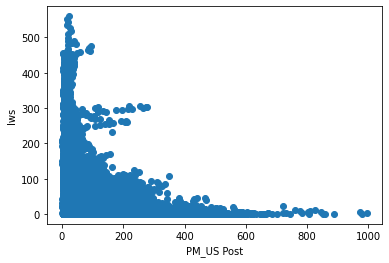

In [ ]:
plt.scatter(df['PM_US Post'],df['Iws'])
plt.xlabel('PM_US Post')
plt.ylabel('Iws')

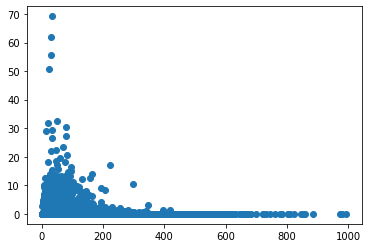

In [ ]:
plt.scatter(df['PM_US Post'],df['precipitation'])

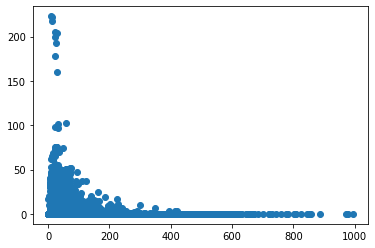

In [ ]:
plt.scatter(df['PM_US Post'],df['Iprec'])

Text(0, 0.5, 'TEMP')

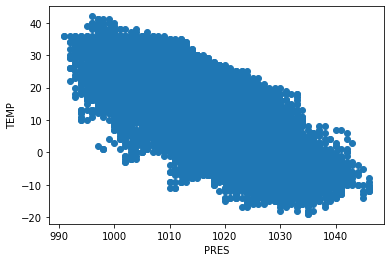

In [ ]:
plt.scatter(df['PRES'],df['TEMP'])
plt.xlabel('PRES')
plt.ylabel('TEMP')

Text(0, 0.5, 'season')

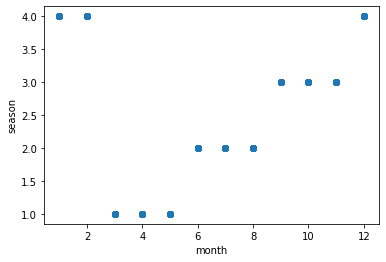

In [ ]:
plt.scatter(df['month'],df['season'])
plt.xlabel('month')
plt.ylabel('season')

Text(0, 0.5, 'HUMI')

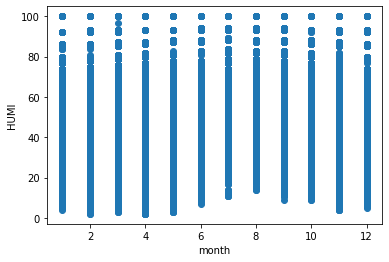

In [ ]:
plt.scatter(df['month'],df['HUMI'])
plt.xlabel('month')
plt.ylabel('HUMI')

Text(0, 0.5, 'DEWP')

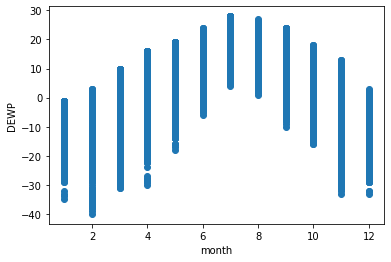

In [ ]:
plt.scatter(df['month'],df['DEWP'])
plt.xlabel('month')
plt.ylabel('DEWP')

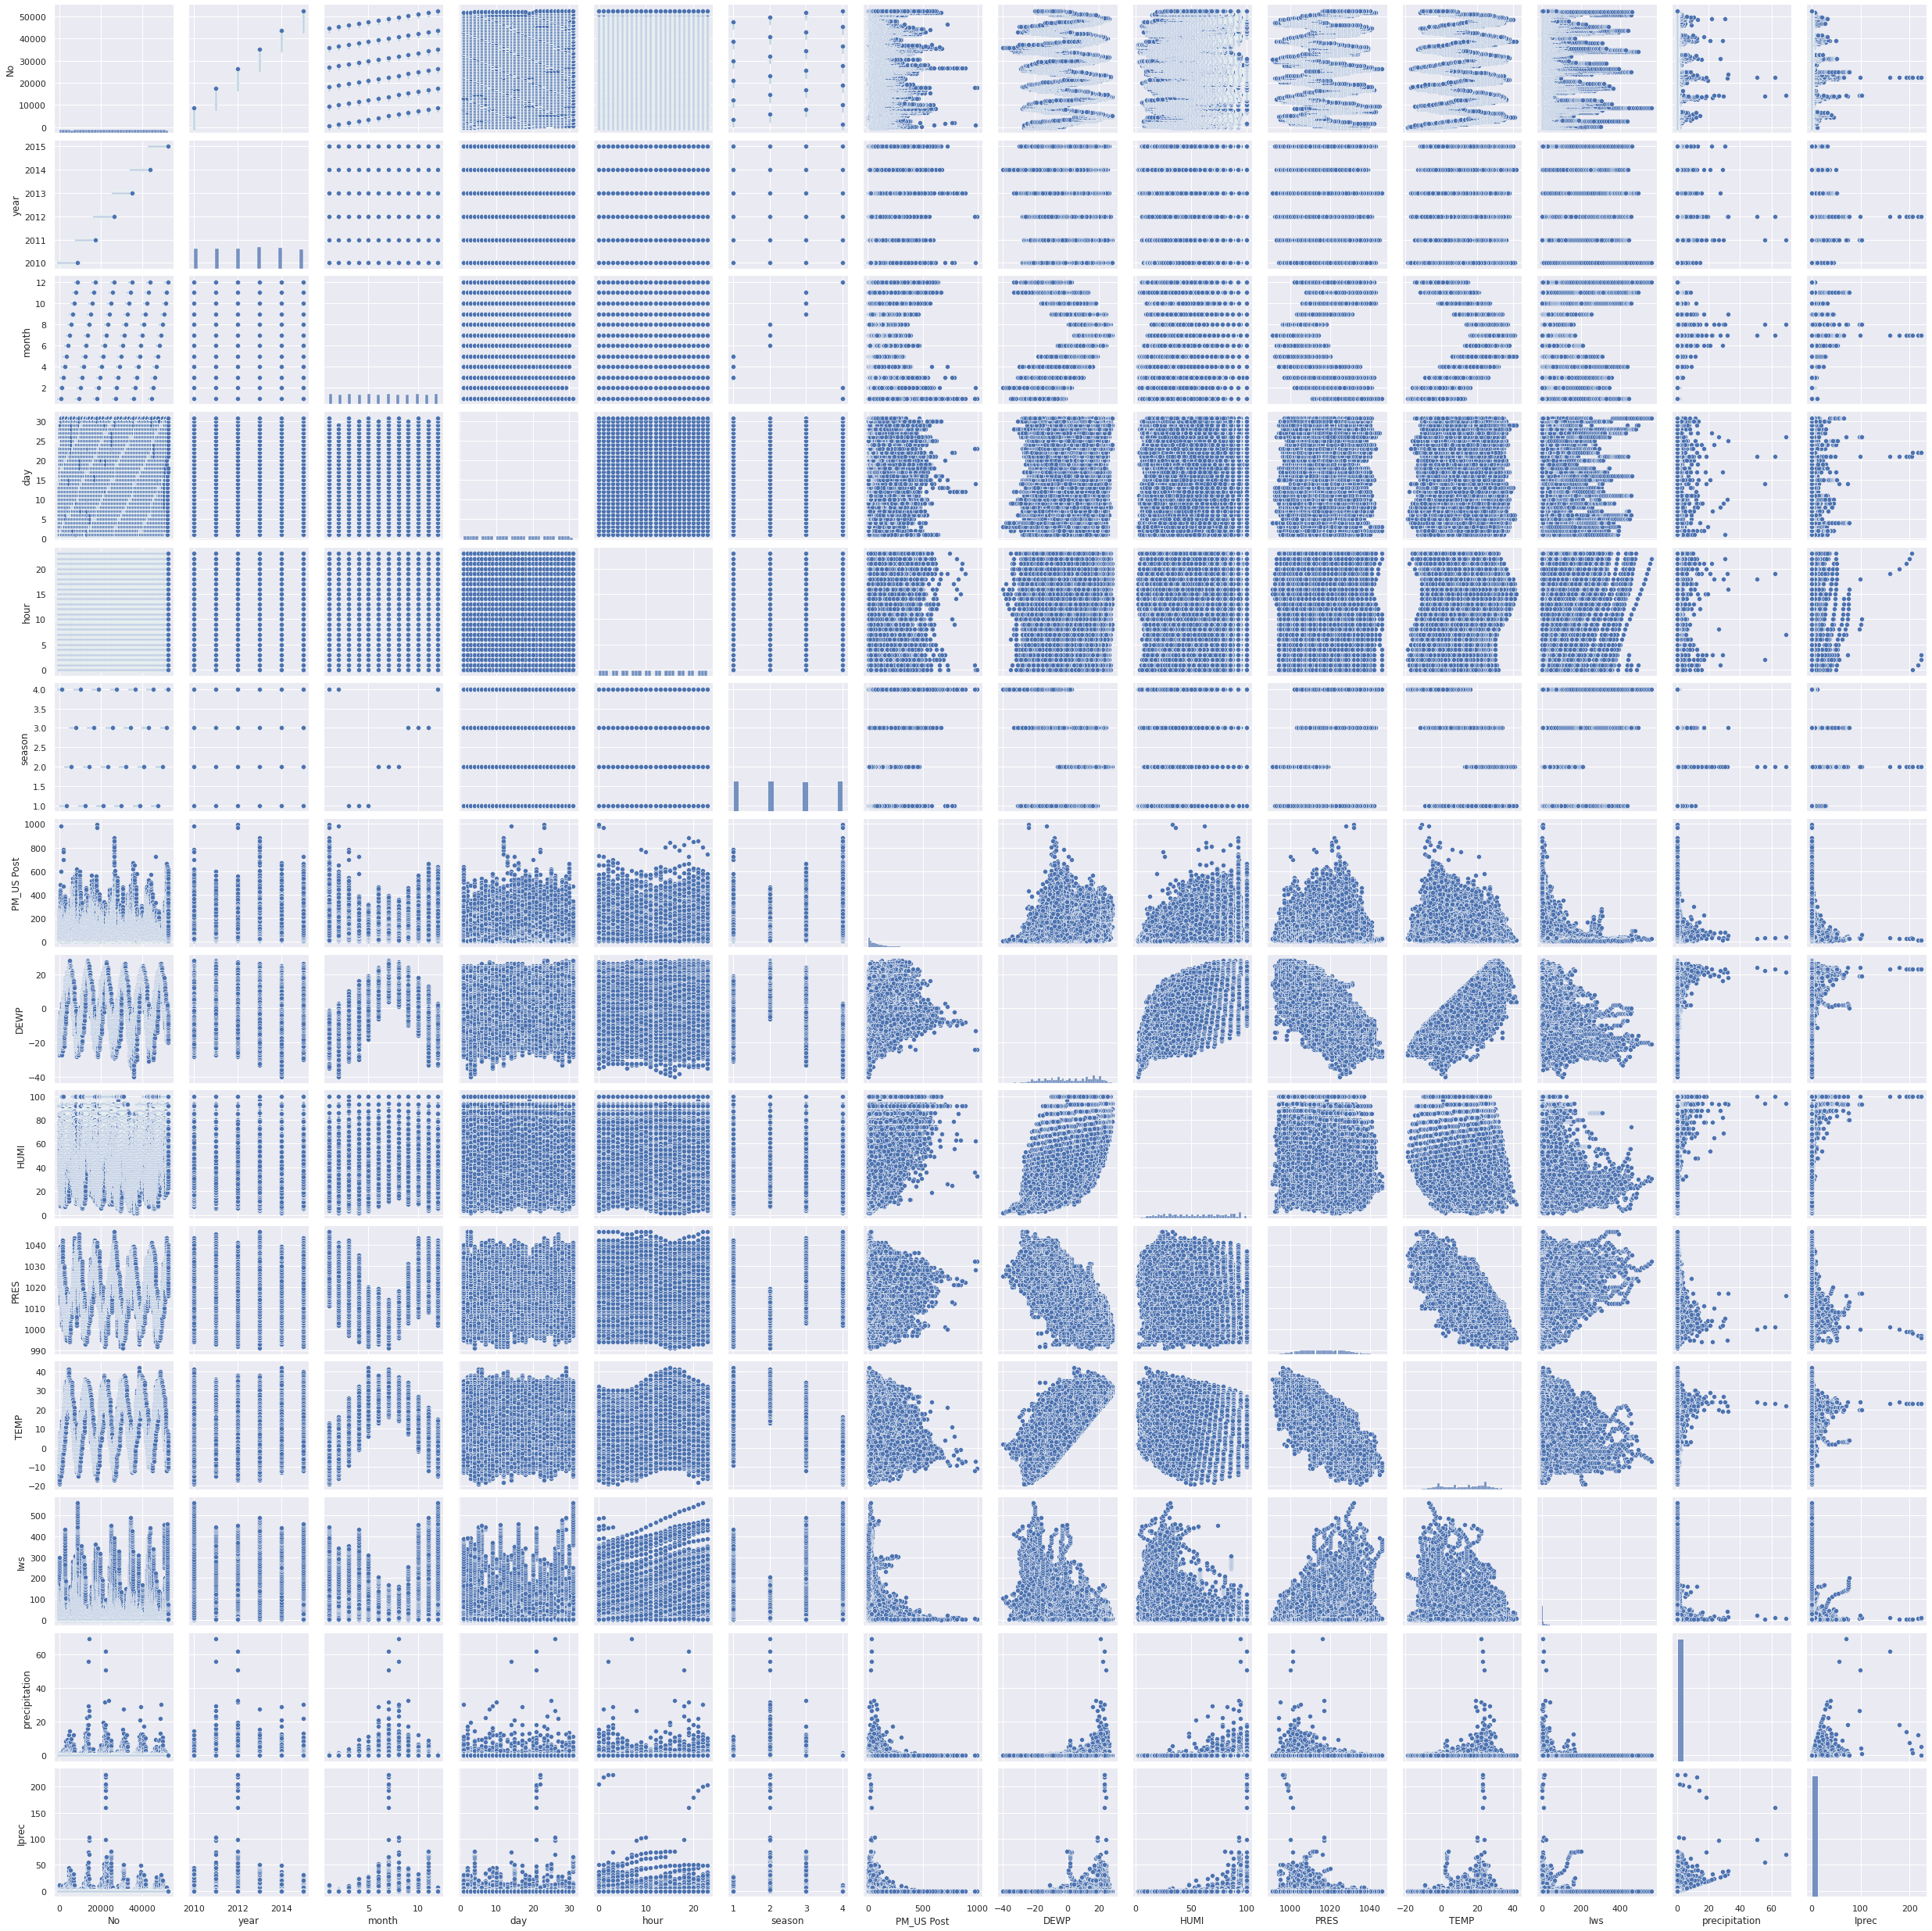

In [ ]:
sb.set()
sb.pairplot(df, height = 2.5)
plt.show();

konverzija kategorickog u numericko obelezje

ne pomaze

In [ ]:
#x.loc[x['season']==2,'season']=5
#x.loc[x['season']==3,'season']=6
#x.loc[x['season']==1,'season']=7
#x.loc[x['season']==4,'season']=8
#print(x['season'].unique())

In [ ]:
print(df['cbwd'].unique())

['cv' 'SE' 'NW' 'NE']


In [ ]:
df.loc[df['cbwd']=='cv','cbwd']=0
df.loc[df['cbwd']=='SE','cbwd']=1
df.loc[df['cbwd']=='NW','cbwd']=2
df.loc[df['cbwd']=='NE','cbwd']=3
print(df['cbwd'].unique())

[0 1 2 3]


In [ ]:
df

No  year  month  day  hour  ...  TEMP  cbwd   Iws  precipitation  Iprec
23        24  2010      1    1    23  ...  -5.0     0  0.89            0.0    0.0
24        25  2010      1    2     0  ...  -4.0     1  1.79            0.0    0.0
25        26  2010      1    2     1  ...  -4.0     1  2.68            0.0    0.0
26        27  2010      1    2     2  ...  -5.0     1  3.57            0.0    0.0
27        28  2010      1    2     3  ...  -5.0     1  5.36            0.0    0.0
...      ...   ...    ...  ...   ...  ...   ...   ...   ...            ...    ...
52579  52580  2015     12   31    19  ...  -3.0     1  7.14            0.0    0.0
52580  52581  2015     12   31    20  ...  -2.0     1  8.03            0.0    0.0
52581  52582  2015     12   31    21  ...  -6.0     3  0.89            0.0    0.0
52582  52583  2015     12   31    22  ...  -6.0     3  1.78            0.0    0.0
52583  52584  2015     12   31    23  ...  -6.0     3  2.67            0.0    0.0

[49579 rows x 15 columns]

In [ ]:
x=df.drop(['No','PM_US Post','precipitation','Iprec','day'], axis=1)
y=df['PM_US Post']

In [ ]:
x

year  month  hour  season  DEWP  HUMI    PRES  TEMP cbwd   Iws
23     2010      1    23       4 -17.0  41.0  1020.0  -5.0    0  0.89
24     2010      1     0       4 -16.0  38.0  1020.0  -4.0    1  1.79
25     2010      1     1       4 -15.0  42.0  1020.0  -4.0    1  2.68
26     2010      1     2       4 -11.0  63.5  1021.0  -5.0    1  3.57
27     2010      1     3       4  -7.0  85.0  1022.0  -5.0    1  5.36
...     ...    ...   ...     ...   ...   ...     ...   ...  ...   ...
52579  2015     12    19       4  -8.0  68.0  1031.0  -3.0    1  7.14
52580  2015     12    20       4  -8.0  63.0  1030.0  -2.0    1  8.03
52581  2015     12    21       4 -10.0  73.0  1030.0  -6.0    3  0.89
52582  2015     12    22       4 -10.0  73.0  1030.0  -6.0    3  1.78
52583  2015     12    23       4  -9.0  79.0  1029.0  -6.0    3  2.67

[49579 rows x 10 columns]

In [ ]:
#x = df.drop(columns=['cbwd'] )
#x_temp = pd.get_dummies(df['cbwd'],prefix='cbwd')
#x = pd.concat([x,x_temp.iloc[:,:-1]],axis=1)

In [ ]:
x

year  month  hour  season  DEWP  HUMI    PRES  TEMP cbwd   Iws
23     2010      1    23       4 -17.0  41.0  1020.0  -5.0    0  0.89
24     2010      1     0       4 -16.0  38.0  1020.0  -4.0    1  1.79
25     2010      1     1       4 -15.0  42.0  1020.0  -4.0    1  2.68
26     2010      1     2       4 -11.0  63.5  1021.0  -5.0    1  3.57
27     2010      1     3       4  -7.0  85.0  1022.0  -5.0    1  5.36
...     ...    ...   ...     ...   ...   ...     ...   ...  ...   ...
52579  2015     12    19       4  -8.0  68.0  1031.0  -3.0    1  7.14
52580  2015     12    20       4  -8.0  63.0  1030.0  -2.0    1  8.03
52581  2015     12    21       4 -10.0  73.0  1030.0  -6.0    3  0.89
52582  2015     12    22       4 -10.0  73.0  1030.0  -6.0    3  1.78
52583  2015     12    23       4  -9.0  79.0  1029.0  -6.0    3  2.67

[49579 rows x 10 columns]

In [ ]:
#x = df.drop(columns=['season'] )
#x_temp1 = pd.get_dummies(df['season'],prefix='season')
#x = pd.concat([x,x_temp1.iloc[:,:-1]],axis=1)

In [ ]:
x

year  month  hour  season  DEWP  HUMI    PRES  TEMP cbwd   Iws
23     2010      1    23       4 -17.0  41.0  1020.0  -5.0    0  0.89
24     2010      1     0       4 -16.0  38.0  1020.0  -4.0    1  1.79
25     2010      1     1       4 -15.0  42.0  1020.0  -4.0    1  2.68
26     2010      1     2       4 -11.0  63.5  1021.0  -5.0    1  3.57
27     2010      1     3       4  -7.0  85.0  1022.0  -5.0    1  5.36
...     ...    ...   ...     ...   ...   ...     ...   ...  ...   ...
52579  2015     12    19       4  -8.0  68.0  1031.0  -3.0    1  7.14
52580  2015     12    20       4  -8.0  63.0  1030.0  -2.0    1  8.03
52581  2015     12    21       4 -10.0  73.0  1030.0  -6.0    3  0.89
52582  2015     12    22       4 -10.0  73.0  1030.0  -6.0    3  1.78
52583  2015     12    23       4  -9.0  79.0  1029.0  -6.0    3  2.67

[49579 rows x 10 columns]

In [ ]:
#x_temp2 = pd.get_dummies(df['month'],prefix='month')
#x = pd.concat([x,x_temp2.iloc[:,:-1]],axis=1)

In [ ]:
x

year  month  hour  season  DEWP  HUMI    PRES  TEMP cbwd   Iws
23     2010      1    23       4 -17.0  41.0  1020.0  -5.0    0  0.89
24     2010      1     0       4 -16.0  38.0  1020.0  -4.0    1  1.79
25     2010      1     1       4 -15.0  42.0  1020.0  -4.0    1  2.68
26     2010      1     2       4 -11.0  63.5  1021.0  -5.0    1  3.57
27     2010      1     3       4  -7.0  85.0  1022.0  -5.0    1  5.36
...     ...    ...   ...     ...   ...   ...     ...   ...  ...   ...
52579  2015     12    19       4  -8.0  68.0  1031.0  -3.0    1  7.14
52580  2015     12    20       4  -8.0  63.0  1030.0  -2.0    1  8.03
52581  2015     12    21       4 -10.0  73.0  1030.0  -6.0    3  0.89
52582  2015     12    22       4 -10.0  73.0  1030.0  -6.0    3  1.78
52583  2015     12    23       4  -9.0  79.0  1029.0  -6.0    3  2.67

[49579 rows x 10 columns]

In [ ]:
#x_temp3 = pd.get_dummies(df['hour'],prefix='hour')
#x = pd.concat([x,x_temp3.iloc[:,:-1]],axis=1)

In [ ]:
x

year  month  hour  season  DEWP  HUMI    PRES  TEMP cbwd   Iws
23     2010      1    23       4 -17.0  41.0  1020.0  -5.0    0  0.89
24     2010      1     0       4 -16.0  38.0  1020.0  -4.0    1  1.79
25     2010      1     1       4 -15.0  42.0  1020.0  -4.0    1  2.68
26     2010      1     2       4 -11.0  63.5  1021.0  -5.0    1  3.57
27     2010      1     3       4  -7.0  85.0  1022.0  -5.0    1  5.36
...     ...    ...   ...     ...   ...   ...     ...   ...  ...   ...
52579  2015     12    19       4  -8.0  68.0  1031.0  -3.0    1  7.14
52580  2015     12    20       4  -8.0  63.0  1030.0  -2.0    1  8.03
52581  2015     12    21       4 -10.0  73.0  1030.0  -6.0    3  0.89
52582  2015     12    22       4 -10.0  73.0  1030.0  -6.0    3  1.78
52583  2015     12    23       4  -9.0  79.0  1029.0  -6.0    3  2.67

[49579 rows x 10 columns]

In [ ]:
#x_temp4 = pd.get_dummies(df['year'],prefix='year')
#x = pd.concat([x,x_temp4.iloc[:,:-1]],axis=1)

In [ ]:
x

year  month  hour  season  DEWP  HUMI    PRES  TEMP cbwd   Iws
23     2010      1    23       4 -17.0  41.0  1020.0  -5.0    0  0.89
24     2010      1     0       4 -16.0  38.0  1020.0  -4.0    1  1.79
25     2010      1     1       4 -15.0  42.0  1020.0  -4.0    1  2.68
26     2010      1     2       4 -11.0  63.5  1021.0  -5.0    1  3.57
27     2010      1     3       4  -7.0  85.0  1022.0  -5.0    1  5.36
...     ...    ...   ...     ...   ...   ...     ...   ...  ...   ...
52579  2015     12    19       4  -8.0  68.0  1031.0  -3.0    1  7.14
52580  2015     12    20       4  -8.0  63.0  1030.0  -2.0    1  8.03
52581  2015     12    21       4 -10.0  73.0  1030.0  -6.0    3  0.89
52582  2015     12    22       4 -10.0  73.0  1030.0  -6.0    3  1.78
52583  2015     12    23       4  -9.0  79.0  1029.0  -6.0    3  2.67

[49579 rows x 10 columns]

In [ ]:
y.describe()

count    49579.000000
mean        95.831703
std         91.801976
min          1.000000
25%         27.000000
50%         69.000000
75%        132.000000
max        994.000000
Name: PM_US Post, dtype: float64

In [ ]:
#x=x.drop(['month_2','hour_0','hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22',], axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(x_train)

model = sm.OLS(y_train, X.astype('float')).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     1713.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:45:42   Log-Likelihood:            -2.5773e+05
No. Observations:               44621   AIC:                         5.155e+05
Df Residuals:                   44610   BIC:                         5.156e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6265.3119    445.245     14.072      0.000    5392.624    7138.000
year          -2.3250      0.221    -10.521      0.000      -2.758      -1.892
month         -1.8423      0.122    -15.159      0.000      -2.081      -1.604
hour           1.7493      0.057     30.656      0.000       1.637       1.861
season         6.0008      0.445     13.483      0.000       5.128       6.873
DEWP          -1.7435      0.173    -10.095      0.000      -2.082      -1.405
HUMI           1.9020      0.054     34.931      0.000       1.795       2.009
PRES          -1.5538      0.069    -22.431      0.000      -1.690      -1.418
TEMP          -0.6952      0.171     -4.076      0.000      -1.029      -0.361
cbwd         -15.3950      0.409    -37.626      0.000     -16.197     -14.593
Iws           -0.2197      0.008    -27.061      0.000      -0.236      -0.204
==============================================================================
Omnibus:                    15688.885   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80264.610
Skew:                           1.627   Prob(JB):                         0.00
Kurtosis:                       8.709   Cond. No.                     2.72e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted) # np.mean((y_test-y_predicted)**2)
    mae = mean_absolute_error(y_test, y_predicted) # np.mean(np.abs(y_test-y_predicted))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

year     month      hour  ...      TEMP      cbwd       Iws
0  1.478101  1.311286 -0.362753  ... -1.367976  1.765989 -0.292599
1 -0.299772 -0.429281 -0.073929  ...  1.108374 -0.355547  0.343614
2 -1.485020 -0.719375  0.936953  ... -0.377436  1.765989 -0.310690
3  1.478101  0.150908  1.370188  ...  0.778194  0.705221 -0.374311
4 -0.892396  1.311286 -0.218341  ...  0.035289  0.705221 -0.374311

[5 rows x 10 columns]

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.118e+06, tolerance: 3.760e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Mean squared error:  4706.907644089931
Mean absolute error:  49.01251724337641
Root mean squared error:  68.60690667921074
R2 score:  0.44263498853960004
R2 adjusted score:  0.44182186485550334
        y      y_pred
0    68.0  104.533730
1    11.0   85.871901
2   122.0  175.954993
3   164.0  128.536297
4    69.0  115.909360
5    23.0   47.939888
6   184.0  184.034849
7    26.0  129.800710
8     6.0    7.757058
9   201.0  123.547988
10   39.0   30.985170
11  128.0   63.433168
12   50.0  133.193970
13  388.0  187.887731
14   20.0   69.237038
15   70.0  113.229938
16   27.0   65.963498
17    8.0   38.595844
18   81.0   98.587388
19  256.0  258.181294


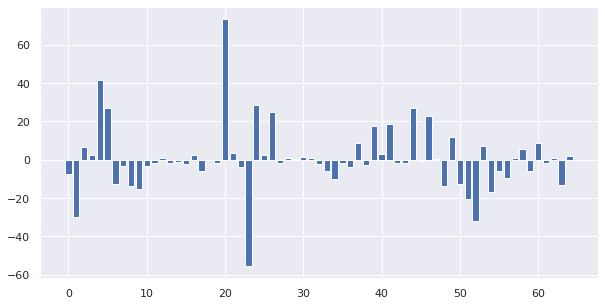

koeficijenti:  [ -7.36656613 -29.90674961   6.40749105   2.71571729  41.35260092
  26.97568428 -12.51770741  -3.19558722 -13.97145716 -15.44739512
  -3.34852552  -1.60260266   0.88219125  -1.7381071   -1.09958785
  -2.23205959   2.25591929  -5.75903692  -0.34624825  -1.65844268
  73.51868813   3.28720185  -3.94879219 -55.43377882  28.7205719
   2.62277573  24.80839264  -1.79149357   0.81663323   0.17787876
   1.46706279   0.97945846  -2.025314    -5.64436344  -9.88730744
  -1.64433743  -3.91113759   8.73839415  -2.83355665  17.3839962
   2.76137376  18.56582844  -1.72820775  -1.4957828   27.24943473
  -0.82295945  22.66263168   0.28690535 -13.54234896  11.68908929
 -12.82625639 -20.30351587 -32.0371453    6.99632445 -16.6607223
  -6.09160154  -9.4131926    0.77611198   5.46867686  -6.10473085
   8.87309834  -1.68119002   0.86125427 -12.98229841   2.10901809]


In [ ]:
# Model initialization
lasso_model = Lasso(alpha=0.01)

# Fit the data(train the model)
lasso_model.fit(x_inter_train, y_train)

# Predict
y_predicted = lasso_model.predict(x_inter_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
plt.show()
print("koeficijenti: ", lasso_model.coef_)